In [1]:
#  Our study aims to use elevation data of forest fire history in Archie Creek Oregon to create a Machine Learning
#  model that can predict forest fire severity based on height data. It is only a preliminary study but the possibility
#  of understanding at what heights are most susceptible to severe fires would be a step into forest fire prevention
#  and better mitigation.

In [2]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
cd Archie_Creek_Data/

/Users/seansenaviratne/Desktop/Archie_Creek_Data


In [4]:
data = pd.read_csv("subset_10percent.csv")


In [5]:
data = data[data.Severity_classes != 9]
data.shape

(29344, 188)

In [6]:
data.head(10)

,Severity_classes,BA_classes,1st_cnt_above_mean,1st_cnt_above_mode,1st_cnt_gt2m,1st_cover_above_mean,1st_cover_above_mode,1st_cover_gt2m,all_1st_cover_above_mean,all_1st_cover_above_mode,...,int_stddev_2m+,int_variance_2m+,pulsecnt,r1_cnt_2m+,r2_cnt_2m+,r3_cnt_2m+,r4_cnt_2m+,r5_cnt_2m+,r6_cnt_2m+,r7_cnt_2m+
0,3,5,199,358,487,2.12,3.82,5.19,2.12,3.84,...,2756.87,7600340.5,9375,487,2,0,0,0,0,0
1,2,3,245,608,609,3.33,8.26,8.27,3.33,8.26,...,2676.90,7165797.0,7362,609,0,0,0,0,0,0
2,2,3,292,573,694,3.36,6.58,7.97,3.37,6.61,...,2624.72,6889172.5,8703,694,2,0,0,0,0,0
3,3,4,434,1130,1131,4.51,11.75,11.76,4.55,11.80,...,2618.20,6854978.5,9619,1131,5,0,0,0,0,0
4,2,2,713,1695,1696,5.90,14.02,14.03,5.91,14.05,...,2567.77,6593435.0,12091,1696,4,0,0,0,0,0
5,3,4,266,691,692,2.01,5.22,5.23,2.03,5.25,...,2447.90,5992201.5,13230,692,4,0,0,0,0,0
6,2,2,546,1251,1252,3.88,8.89,8.90,3.89,9.05,...,3039.50,9238555.0,14070,1252,22,0,0,0,0,0
7,3,4,182,432,433,1.86,4.42,4.43,1.86,4.42,...,2973.72,8843002.0,9783,433,0,0,0,0,0,0
8,2,3,629,1344,1448,6.70,14.32,15.43,6.84,14.79,...,2837.77,8052916.5,9386,1448,49,0,0,0,0,0
9,4,7,844,2025,2026,8.47,20.32,20.33,8.51,20.51,...,2603.74,6779443.5,9968,2026,19,0,0,0,0,0


In [7]:
# KNN, Random Forest, Support Vector Machines

In [39]:
variables = data[["1st_cover_gt2m", "elev_canopy_relief_ratio", "elev_CV_2m+", "elev_P20_2m+","elev_P90_2m+",
"elev_quadratic_mean", "FIRST_RETURNS_elev_canopy_relief_ratio", "int_ave_2m+"]]

target = data['Severity_classes']


In [36]:
variables.head(5)

,1st_cover_gt2m,elev_canopy_relief_ratio,elev_CV_2m+,elev_P20_2m+,elev_P90_2m+,elev_quadratic_mean,FIRST_RETURNS_elev_canopy_relief_ratio,int_ave_2m+
0,5.19,0.26,0.21,2.25,3.53,2.82,0.26,5994.10
1,8.27,0.20,0.21,2.22,3.45,2.75,0.20,6973.51
2,7.97,0.23,0.19,2.21,3.42,2.72,0.23,7440.64
3,11.76,0.19,0.22,2.20,3.47,2.74,0.19,7303.92
4,14.03,0.25,0.18,2.21,3.32,2.68,0.25,6948.74


In [37]:
variables.columns

Index(['1st_cover_gt2m', 'elev_canopy_relief_ratio', 'elev_CV_2m+',
       'elev_P20_2m+', 'elev_P90_2m+', 'elev_quadratic_mean',
       'FIRST_RETURNS_elev_canopy_relief_ratio', 'int_ave_2m+'],
      dtype='object')

In [42]:
data['Severity_classes']

0        3
1        2
2        2
3        3
4        2
5        3
6        2
7        3
8        2
9        4
10       3
11       4
12       3
13       2
14       3
15       2
16       2
17       1
18       1
19       4
20       4
21       4
22       4
23       4
24       4
25       4
26       2
27       3
28       2
29       1
        ..
29345    4
29346    4
29347    4
29348    4
29349    3
29350    3
29351    4
29352    4
29353    4
29354    4
29355    4
29356    4
29357    3
29358    3
29359    3
29360    4
29361    4
29362    4
29363    4
29364    4
29365    4
29366    4
29367    4
29368    4
29369    4
29370    4
29371    4
29372    4
29373    2
29374    3
Name: Severity_classes, Length: 29344, dtype: int64

Feature: 0, Score: 0.17691
Feature: 1, Score: 0.08348
Feature: 2, Score: 0.08250
Feature: 3, Score: 0.14202
Feature: 4, Score: 0.13658
Feature: 5, Score: 0.11815
Feature: 6, Score: 0.08471
Feature: 7, Score: 0.17565


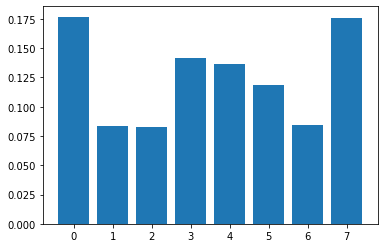

In [12]:
# Feature Selection - DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(variables,target)
importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Feature: 0, Score: 0.19915
Feature: 1, Score: 0.06949
Feature: 2, Score: 0.08160
Feature: 3, Score: 0.13421
Feature: 4, Score: 0.13024
Feature: 5, Score: 0.11412
Feature: 6, Score: 0.07900
Feature: 7, Score: 0.19219


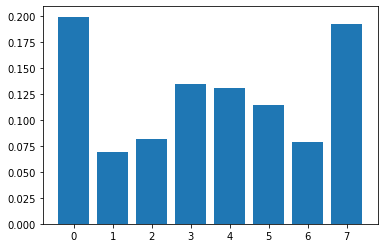

In [13]:
# Feature Selection - Random Forest 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(variables,target)
importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Based on a preliminary feature selection trial - variables ["1st_cover_gt2m","int_ave_2m_+", "elev_P20_2m" , "elev_P90_2m" and "elev_quadratic_mean"] are the most impactful to fire severity classes based on the two feature selection processes most conducive to Machine Learning 

FEATURE 0:
1st_cover_gt2m  = 1st cover ground to 2m - this variable describes the percentage of area under the crown of the tree (head of the tree). 

FEATURE 3:
elev_P20_2m+ : 20th percentile in vegetation height

FEATURE 4:
elev_P90_2m+ : 90th percentile in vegetation height

FEATURE 5: 
elev_quadratic_mean : quadratic mean of vegetation height

FEATURE 7:
int_ave_2m+ = mean instensity of returns greater than 2m (up to 2m is considered the forest floor) - this variables describes the mean intensity of returns


Feature: 0, Score: 0.23157
Feature: 1, Score: 0.19062
Feature: 2, Score: 0.18658
Feature: 3, Score: 0.16612
Feature: 4, Score: 0.22512


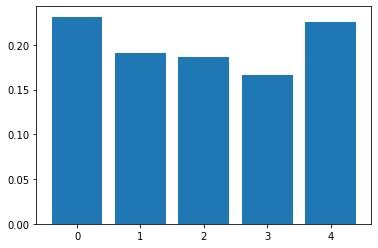

In [14]:
import matplotlib.pyplot as plt

features = data[["1st_cover_gt2m", "elev_P20_2m+","elev_P90_2m+","elev_quadratic_mean", "int_ave_2m+"]]
target = data['Severity_classes']

model = RandomForestRegressor()
model.fit(features,target)
importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

FINAL FEATURES:
    - 1st_cover_gt2m
    - elev_P20_2m+
    - elev_P90_2m+
    - elev_quadratic_mean
    - int_ave_2m+
    

In [16]:
from sklearn.model_selection import train_test_split

dataset = data[["1st_cover_gt2m", "elev_P20_2m+","elev_P90_2m+","elev_quadratic_mean", "int_ave_2m+","Severity_classes"]]
train,test = train_test_split(dataset)

In [18]:
x_train = train.drop(columns="Severity_classes")
y_train = train['Severity_classes']

x_test = test.drop(columns="Severity_classes")
y_test = test['Severity_classes']

X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [12]:
x_train.head(5)

,1st_cover_gt2m,elev_P20_2m+,elev_P90_2m+,elev_quadratic_mean,int_ave_2m+
26277,82.68,25.91,38.83,31.28,5640.53
575,99.86,20.67,34.85,27.11,5879.22
19380,97.07,17.34,39.66,28.08,5661.37
12232,28.53,3.21,10.68,6.93,5830.59
17126,99.45,17.23,47.26,30.43,5433.66


In [13]:
y_train.head(5)

26277    4
575      1
19380    4
12232    4
17126    4
Name: Severity_classes, dtype: int64

[[907 221 202 379]
 [406 118 121 259]
 [461 159 151 330]
 [619 203 239 811]]
             precision    recall  f1-score   support

          1       0.38      0.53      0.44      1709
          2       0.17      0.13      0.15       904
          3       0.21      0.14      0.17      1101
          4       0.46      0.43      0.44      1872

avg / total       0.34      0.36      0.34      5586



Text(0, 0.5, 'Mean Error')

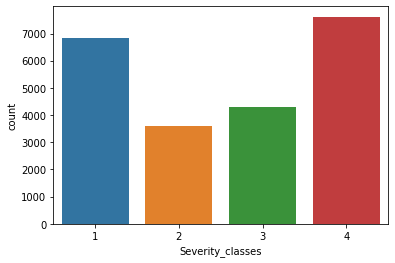

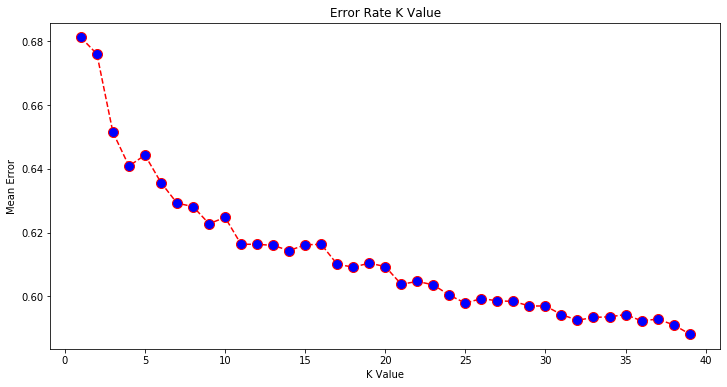

In [14]:
balanced_dataset = dataset.sort_values(by="Severity_classes")[:-7000]
sns.countplot(balanced_dataset['Severity_classes'])
train,test = train_test_split(balanced_dataset)

xb_train = train.drop(columns="Severity_classes")
yb_train = train['Severity_classes']

xb_test = test.drop(columns="Severity_classes")
yb_test = test['Severity_classes']

scaler = StandardScaler()
scaler.fit(xb_train)

XB_train = scaler.transform(xb_train)
XB_test = scaler.transform(xb_test)

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(XB_train, yb_train)

yb_pred = classifier.predict(XB_test)

print(confusion_matrix(yb_test, yb_pred))
print(classification_report(yb_test, yb_pred))


errorb = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(XB_train, yb_train)
    pred_i = knn.predict(XB_test)
    errorb.append(np.mean(pred_i != yb_test))
    
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), errorb, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

[[ 491   45   74 1073]
 [ 189   27   32  664]
 [ 182   26   37  792]
 [ 513   70  109 3012]]
             precision    recall  f1-score   support

          1       0.36      0.29      0.32      1683
          2       0.16      0.03      0.05       912
          3       0.15      0.04      0.06      1037
          4       0.54      0.81      0.65      3704

avg / total       0.40      0.49      0.42      7336

Mean Absolute Error: 1.0811068702290076
Mean Squared Error: 2.648173391494002
Root Mean Squared Error: 1.6273209245548348


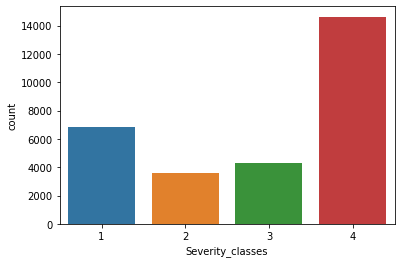

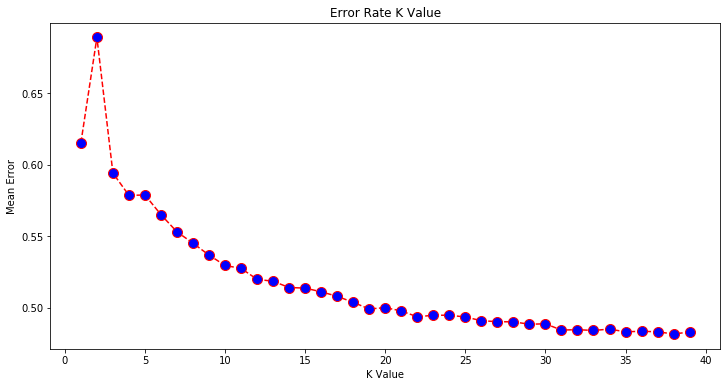

In [58]:
# KNN with Unbalanced dataset
sns.countplot(dataset['Severity_classes'])

scaler = StandardScaler()
scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=15)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [39]:
#List Hyperparameters that we want to tune.
leaf_size = (2,5,10)
n_neighbors = (5,10,15)
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
knn_2 = KNeighborsClassifier()
clf = GridSearchCV(knn_2, hyperparameters, cv=5)
best_model = clf.fit(X_train,y_train)
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [45]:
# Random Forest Model
# N_estimators = 20, 200
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.0447791712104688
Mean Squared Error: 1.469294663304253
Root Mean Squared Error: 1.212144654446924


In [75]:
print(regressor.get_params())

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': 1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [76]:
# Model Tuning

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)



{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [78]:
rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=  17.4s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=  17.4s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total= 2.3min
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 12.6min


[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=  55.8s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total= 2.2min
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=  52.9s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total= 1.1min
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=

[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True, total= 1.1min
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False, total= 2.1min
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total= 1.6min
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total= 2.8min
[CV] n_estimators=

[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total=  29.8s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total=  28.6s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total= 1.1min
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=  42.0s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=1800,

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False, total=  30.2s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=  42.4s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=  43.4s
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=  42.5s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=400, 

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 58.7min


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total= 2.4min
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total= 2.3min
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total= 2.0min
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total= 4.4min
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimat

[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False, total= 2.3min
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total= 2.8min
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total=  56.6s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total=  57.5s
[CV] n_estima

[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False, total= 1.1min
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False, total=  25.4s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False, total=  26.6s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False, total=  27.1s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=

[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total= 1.9min
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=  17.7s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=  18.2s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=  39.0s
[CV] n_estimators=1600, 

[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total= 1.3min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total= 2.2min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total= 2.2min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total= 3.1min
[CV] n_estimators=2000

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 127.3min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [79]:
rf_random.best_params_

{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

Best_Params
{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}

In [47]:
regressor = RandomForestRegressor(n_estimators=1000, 
                                  min_samples_split=5,
                                  min_samples_leaf=2, 
                                  max_features="sqrt", 
                                  max_depth=10, 
                                  bootstrap=True)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.0357658889507526
Mean Squared Error: 1.397885817360596
Root Mean Squared Error: 1.1823222138489136


In [23]:
# SVM - Sigmoid Kernel

svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))ws

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

[[ 549   15  394  755]
 [ 264    7  220  386]
 [ 333    9  259  487]
 [1177   21  780 1680]]
             precision    recall  f1-score   support

          1       0.24      0.32      0.27      1713
          2       0.13      0.01      0.02       877
          3       0.16      0.24      0.19      1088
          4       0.51      0.46      0.48      3658

avg / total       0.35      0.34      0.33      7336

Mean Absolute Error: 1.3411941112322792
Mean Squared Error: 3.2305070883315157
Root Mean Squared Error: 1.797361145772189


In [33]:
# Model tuning with GridSearch CV
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['sigmoid']}  
  
grid = GridSearchCV(svclassifier, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV]  C=0.1, gamma=1, kernel=sigmoid, score=0.3193403298350825, total=   8.1s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.1s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=sigmoid, score=0.30916030534351147, total=   9.3s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   26.0s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=sigmoid, score=0.3286980231765508, total=  11.3s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV]  C=0.1, gamma=0.1, kernel=sigmoid, score=0.42347008314024803, total=  12.5s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV]  C=0.1, gamma=0.1, kernel=sigmoid, score=0.3914940021810251, total=  11.8s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV]  C=0.1, gamma=0.1, kernel=sigmoid, score=0.38554873892297203, total=  11.9s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=0.1, gamma=0.01, kernel=sigmoid, score=0.49775112443778113, total=  12.3s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=0.1, gamma=0.01, kernel=sigmoid, score=0.49781897491821153, total=  12.1s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=0.1, gamma=0.01, kernel=sigmoid, score=0.49788684389911386, total=  11.3s
[CV] C=0

[CV]  C=100, gamma=0.0001, kernel=sigmoid, score=0.49775112443778113, total=   5.4s
[CV] C=100, gamma=0.0001, kernel=sigmoid .............................
[CV]  C=100, gamma=0.0001, kernel=sigmoid, score=0.49781897491821153, total=   5.5s
[CV] C=100, gamma=0.0001, kernel=sigmoid .............................
[CV]  C=100, gamma=0.0001, kernel=sigmoid, score=0.49788684389911386, total=   5.3s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.3185225569033665, total=   7.6s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.3073882224645583, total=   9.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.32665303340149965, total= 8.8min
[CV] C=1000, gamma=0.1, kernel=sigmoid ...............................
[CV]  C=1000, gamma=0.1, kernel=sigmoid, score=0.41215755758484396, total=   7.5s
[C

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 28.1min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [34]:
print(grid.best_params_) 
print(grid.best_estimator_) 

{'C': 100, 'gamma': 0.001, 'kernel': 'sigmoid'}
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [35]:
# Model with Tuned parameters 

svclassifier = SVC(kernel='sigmoid', C=100, gamma=0.001, )
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

[[   0    0    0 1713]
 [   0    0    0  877]
 [   0    0    0 1088]
 [   0    0    0 3658]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00      1713
          2       0.00      0.00      0.00       877
          3       0.00      0.00      0.00      1088
          4       0.50      1.00      0.67      3658

avg / total       0.25      0.50      0.33      7336

Mean Absolute Error: 1.0879225736095965
Mean Squared Error: 2.7280534351145036
Root Mean Squared Error: 1.6516820018134555


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
